# dicision tree

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('possum.csv')

In [11]:
print(df.sample(5, random_state=44))

    case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
57    58     4  other   m  3.0     94.5    64.2      91.0   39.0      66.5   
80    81     6  other   m  3.0     90.6    56.0      85.5   38.0      65.6   
27    28     1    Vic   m  4.0     93.8    56.8      87.0   34.5      73.2   
97    98     7  other   m  5.0     93.2    68.6      84.0   35.0      65.6   
61    62     5  other   f  3.0     91.3    58.0      90.5   39.0      65.5   

    earconch   eye  chest  belly  
57      46.4  14.4   30.5   33.0  
80      41.7  17.0   27.5   35.0  
27      53.0  15.3   27.0   30.0  
97      44.3  14.5   28.5   32.0  
61      41.3  16.0   27.0   32.0  


In [7]:
df = df.dropna()

In [13]:
X = df.drop(["case", "site", "Pop", "sex"], axis=1)
y = df["sex"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=44)

In [14]:
rf_model = RandomForestClassifier(n_estimators=50,max_features=3, random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=50, random_state=44)

In [16]:
predictions = rf_model.predict(X_test)
print(predictions)

['f' 'm' 'm' 'm' 'f' 'f' 'm' 'm' 'm' 'm' 'm' 'f' 'm' 'm' 'm' 'm' 'm' 'f'
 'm' 'm' 'm' 'f' 'f' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'f']


In [19]:
predictprob = rf_model.predict_proba(X_test)
print(predictprob)

[[0.5  0.5 ]
 [0.26 0.74]
 [0.36 0.64]
 [0.3  0.7 ]
 [0.66 0.34]
 [0.54 0.46]
 [0.48 0.52]
 [0.42 0.58]
 [0.18 0.82]
 [0.34 0.66]
 [0.48 0.52]
 [0.54 0.46]
 [0.4  0.6 ]
 [0.28 0.72]
 [0.48 0.52]
 [0.36 0.64]
 [0.4  0.6 ]
 [0.54 0.46]
 [0.44 0.56]
 [0.06 0.94]
 [0.32 0.68]
 [0.56 0.44]
 [0.66 0.34]
 [0.46 0.54]
 [0.18 0.82]
 [0.46 0.54]
 [0.34 0.66]
 [0.26 0.74]
 [0.2  0.8 ]
 [0.1  0.9 ]
 [0.5  0.5 ]]


In [20]:
importances = rf_model.feature_importances_
print(importances)

[0.05237143 0.1461762  0.08878178 0.11322144 0.07150935 0.16099193
 0.11990223 0.11082213 0.05286153 0.08336197]


In [28]:
columns = X.columns
i = 0
while i < len(columns):
    print(f"the importance of feature'{columns[i]}' is {round(importances[i] * 100, 2)}%.")
    i += 1

the importance of feature'age' is 5.24%.
the importance of feature'hdlngth' is 14.62%.
the importance of feature'skullw' is 8.88%.
the importance of feature'totlngth' is 11.32%.
the importance of feature'taill' is 7.15%.
the importance of feature'footlgth' is 16.1%.
the importance of feature'earconch' is 11.99%.
the importance of feature'eye' is 11.08%.
the importance of feature'chest' is 5.29%.
the importance of feature'belly' is 8.34%.


In [27]:
new_possum = [[5.24, 14.62, 8.88, 11.32, 7.15, 16.1, 11.99, 11.08, 5.29, 8.34]]
print(rf_model.predict(new_possum))

['f']


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [6]:
irisData = load_iris()

In [7]:
feature_names = irisData.feature_names
print("feature names ", feature_names)

target names  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
target_names = irisData.target_names
print("target names ", target_names)

target names  ['setosa' 'versicolor' 'virginica']


In [9]:
X = irisData.data
y = irisData.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=44)

In [11]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [15]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

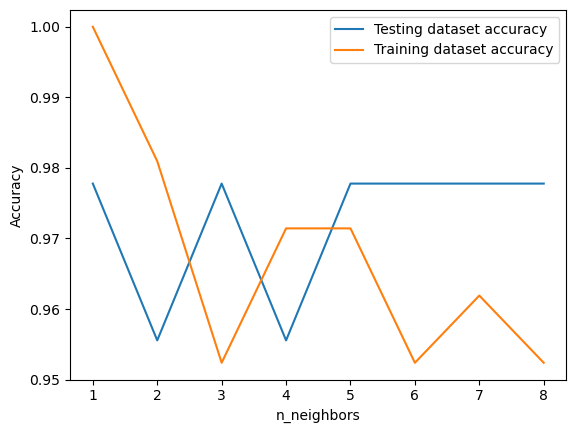

In [17]:
plt.plot(neighbors, test_accuracy, label='Testing dataset accuracy')
plt.plot(neighbors, train_accuracy, label='Training dataset accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# SVM

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [19]:
cancer_data = datasets.load_breast_cancer()

In [22]:
print("Data Point 5: ", cancer_data.data[5])
print("Data Shape: ", cancer_data.data.shape)
print("Target Values: ", cancer_data.target)

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3, random_state=109)


Data Point 5:  [1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
Data Shape:  (569, 30)
Target Values:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1

In [24]:
cls = svm.SVC(kernel = "linear")
cls.fit(X_train, y_train)
pred = cls.predict(X_test)

In [25]:
accuracy = metrics.accuracy_score(y_test, y_pred=pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9649122807017544


In [26]:
precision = metrics.precision_score(y_test, y_pred=pred)
print("Precision: ", precision)

Precision:  0.9811320754716981


In [27]:
recall = metrics.recall_score(y_test, y_pred=pred)
print("Recall:", recall)

Recall: 0.9629629629629629


In [28]:
print(metrics.classification_report(y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

